In [3]:
import numpy as np
import pickle

In [24]:
# datapath = './bertvsbert/data/poj/norm.pkl'
datapath = './bigJava/dataset.pkl'
train_path = './bigJava/train.pkl'
test_path = './bigJava/test.pkl'

In [23]:
with open(datapath, 'rb') as f:
    data = pickle.load(f)

In [27]:
len(data[0]['norm'])

185675

In [28]:
with open(train_path, 'wb') as f:
    pickle.dump(data[0], f)
with open(test_path, 'wb') as f:
    pickle.dump(data[1], f)

In [30]:
ls = [len(data['norm'][i]) for i in range(len(data['label']))]

In [32]:
print(min(ls))

24


In [33]:
def get_start_idxs(tokens, sub_tokens, bpe_indicator):
    starts = list(filter(lambda i: sub_tokens[i][0] == bpe_indicator, range(len(sub_tokens))))
    print(len(starts))

In [28]:
token = some[0]
subtoken = tok.tokenize(" ".join(some[0]))

In [35]:
get_start_idxs(token, subtoken, 'Ġ')
len(token)

293


294

In [1]:
import torch
from models.codebert import codebert_mlm, codebert_cls
import os
# os.chdir('../FRESH/Rationale_Analysis')
# os.chdir('models')
import utils

In [2]:
device = torch.device("cpu")
model_path = "./save/java-classifier4/checkpoint-36000-0.9365"
cls_model = codebert_cls(model_path, device)

In [3]:
inputs = [
    "int main ( ) { int n , i ; n <= 11 ; return 0 }",
    # "int main ( ) { int <mask>, i ; <mask> = 1 ; return 0 }", 
    "void main ( ) { double x ; }",
]
inputs = [s.split() for s in inputs]

In [4]:
from scorer.base_scorer import SaliencyScorer
from scorer.gradient_scorer import  GradientSaliency

In [5]:
from utils import gen_score_img

In [6]:
scorer = GradientSaliency(cls_model)
attentions = scorer(inputs)

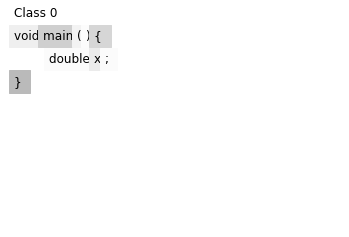

In [8]:
gen_score_img(inputs[1], attentions[1][:len(inputs[1])])

In [33]:
import torch
from models.codebert import codebert_cls
from scorer.base_scorer import SaliencyScorer
from scorer.gradient_scorer import GradientSaliency

import pickle
from utils import gen_score_img

In [15]:
model_path = "./save/java-classifier4/checkpoint-36000-0.9365"
data_path = '../bigJava/datasets/test.pkl'

with open(data_path, 'rb') as f:
    test_data = pickle.load(f)
device = torch.device("cpu")
cls_model = codebert_cls(model_path, device)
scorer = SaliencyScorer(cls_model)

In [24]:
a = torch.zeros((2, 3))

In [29]:
inputs = [test_data['norm'][81]]

In [31]:
l = min(len(inputs[0]), len(attentions[0]))

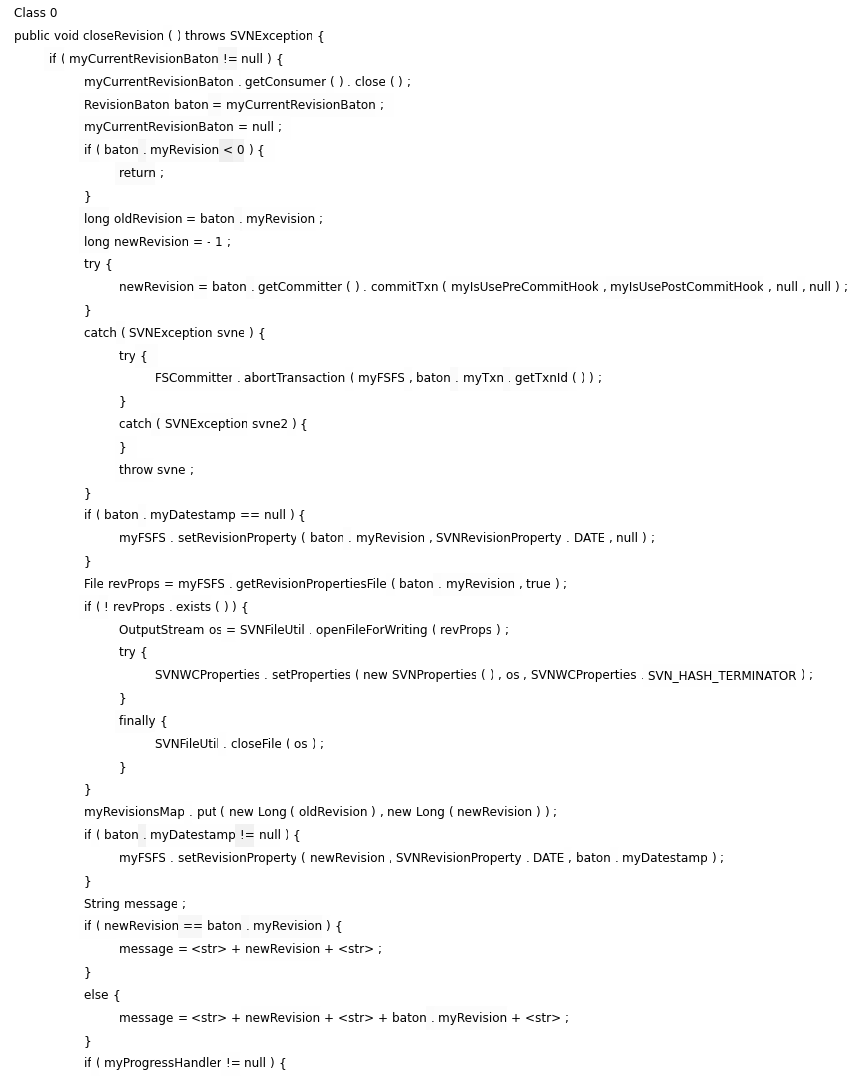

In [34]:
gen_score_img(inputs[0][:l], attentions[0][:l], 0)

In [17]:
attentions = scorer([test_data['norm'][81]])

In [21]:
len(attentions[0])

304